# Comparision between Models

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from Utils import ReadEncoderData, ReadRegressorData

def GetRegressorDataAsDict(path : str):
    epochs, mse, vmse, vr2 = ReadRegressorData(path)
    
    return {
        'Epochs' : epochs,
        'TMSE'   : mse,
        'VMSE'   : vmse,
        'VR2'    : vr2
    }

### Load Contrastive Models

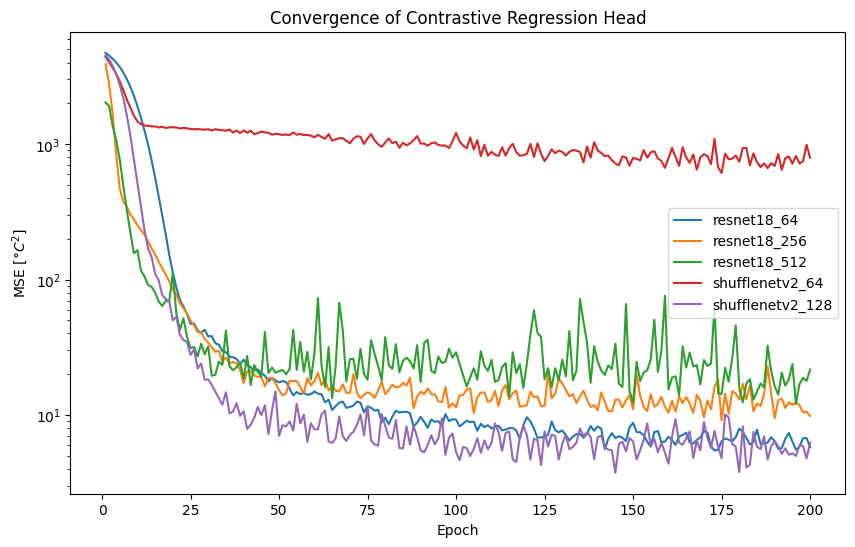

In [53]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['shufflenetv2_64'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0/Regressor')

epochs = 200
plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
        Models[key]['VMSE'][:epochs] for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Regression Head")
plt.xlabel("Epoch")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.legend([key for key, _ in Models.items()])
plt.yscale("log")
plt.show()



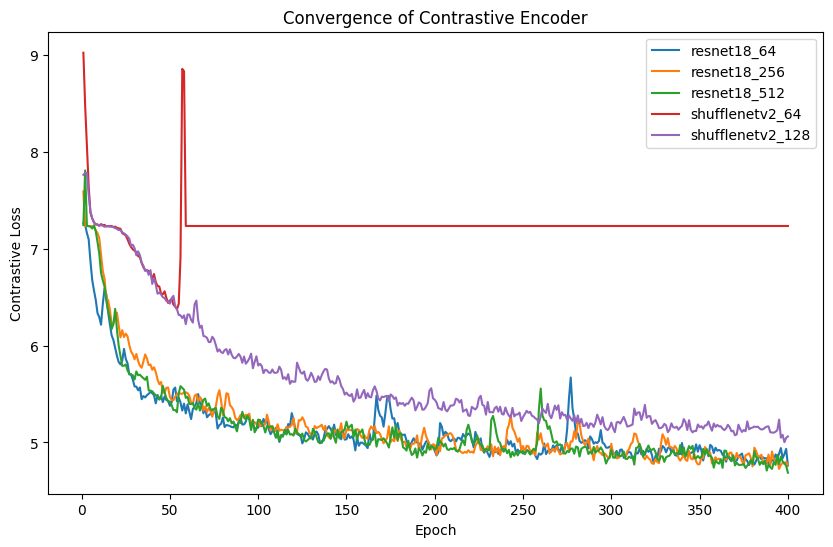

In [40]:
Models = {}
Models['resnet18_64'] = ReadEncoderData('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_256'] = ReadEncoderData('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Encoder')
Models['resnet18_512'] = ReadEncoderData('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Encoder')
Models['shufflenetv2_64'] = ReadEncoderData('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0/Encoder')
Models['shufflenetv2_128'] = ReadEncoderData('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0/Encoder')

epochs = 400
plt.figure(figsize=[10, 6])
plt.plot(
    np.array([
        np.arange(1, epochs+1) for _ in range(len(Models))
    ]).T,
    np.array([
        np.sqrt(Models[key][1])[:epochs] for key, item in Models.items()
    ]).T
)
plt.title("Convergence of Contrastive Encoder")
plt.xlabel("Epoch")
plt.ylabel("Contrastive Loss")
plt.legend([key for key, _ in Models.items()])
plt.show()

### Plot maximally obtained RMSE

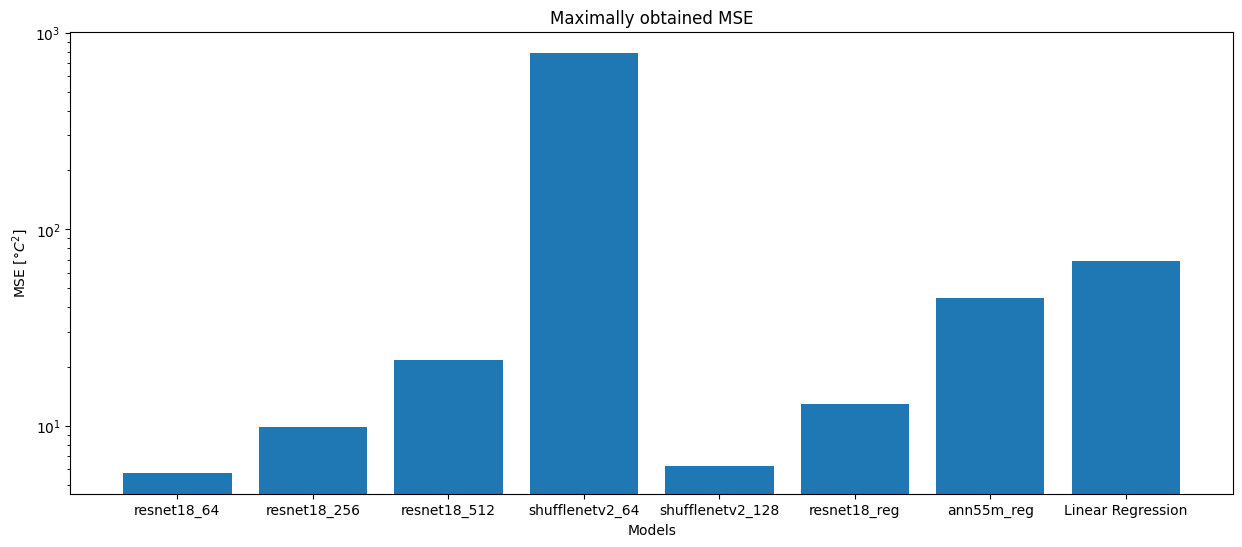

In [ ]:
Models = {}
Models['resnet18_64'] = GetRegressorDataAsDict('ConModels/Resnet18/5_400ep_64e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_256'] = GetRegressorDataAsDict('ConModels/Resnet18/1_400ep_256e_r_200ep_1_t1.0_b128/Regressor')
Models['resnet18_512'] = GetRegressorDataAsDict('ConModels/Resnet18/4_400ep_512e_r_200ep_1_t1.0_b128/Regressor')
Models['shufflenetv2_64'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_64e_r_200ep_1_t1.0/Regressor')
Models['shufflenetv2_128'] = GetRegressorDataAsDict('ConModels/ShuffleNetV2/1_400ep_128e_r_200ep_1_t1.0/Regressor')
Models['resnet18_reg'] = GetRegressorDataAsDict('Resnet18Models')
Models['ann55m_reg']   = GetRegressorDataAsDict('ANNModels/55M')
Models['Linear Regression'] = {
    'VMSE' : np.array([69.12810516357422]), # Obtained directly from Baseline_LinearRegression.ipynb
    'RMSE' : np.array([8.3143310546875]),
    'VR2'  : np.array([0.946037232875824])
}

plt.figure(figsize=[15, 6])
plt.bar(
    [key for key, _ in Models.items()],
    np.array([
        Models[key]['VMSE'][-1] for key, item in Models.items()
    ]).T
)
plt.title("Maximally obtained MSE")
plt.xlabel("Models")
plt.ylabel(r"MSE $[\degree C^2]$")
plt.yscale("log")
plt.show()

### Number of learnable parameters per model

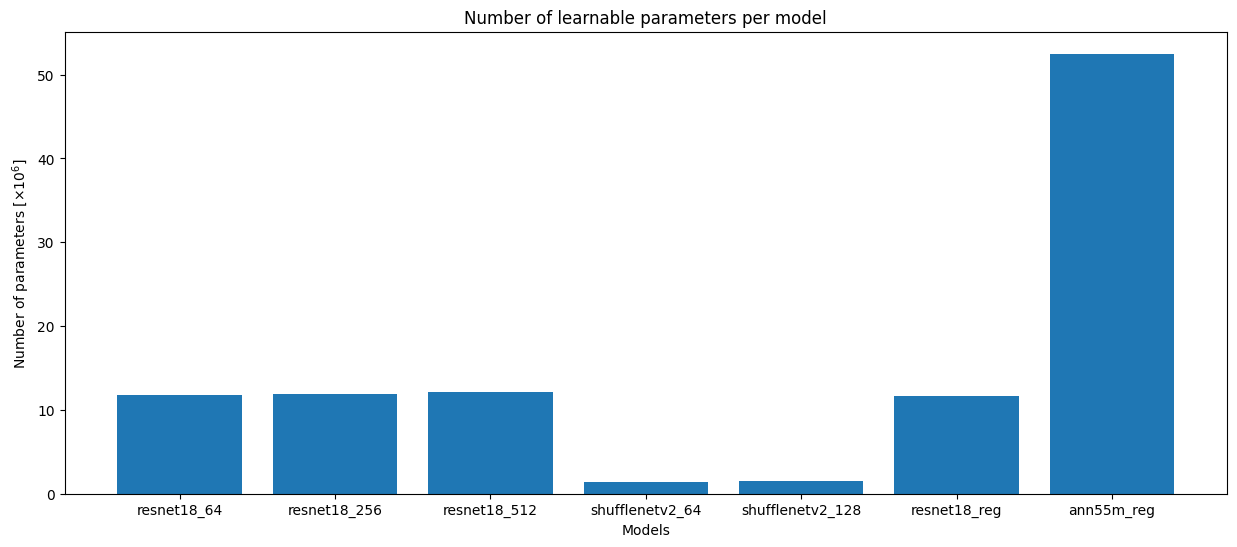

In [59]:
Models = {}
Models['resnet18_64']      = 11_683_240 + (512 * 64 + 64) + (64 * 32 + 32) + (32 * 1 + 1)
Models['resnet18_256']     = 11_683_240 + (512 * 256 + 256) + (256 * 128 + 128) + (128 * 1 + 1)
Models['resnet18_512']     = 11_683_240 + (512 * 512 + 512) + (512 * 256 + 256) + (256 * 1 + 1)
Models['shufflenetv2_64']  = 1_366_424  + (1000 * 64 + 64) + (64 * 32 + 32) + (32 * 1 + 1)
Models['shufflenetv2_128'] = 1_366_424  + (1000 * 128 + 128) + (128 * 64 + 64) + (64 * 1 + 1)
Models['resnet18_reg']     = 11_683_240 + (512 * 1 + 1)
Models['ann55m_reg']       = (126 * 126 * 2048 + 2048) + 4 * (2048 * 2048 + 2048) + (2048 * 1024 + 1024) + (1024 * 1024 + 1024) + (1024 * 64 + 64) + (64 * 1 + 1)

plt.figure(figsize=[15, 6])
plt.bar(
    [key for key, _ in Models.items()],
    np.array([
        Models[key] for key, item in Models.items()
    ]).T / 1e6
)
plt.title("Number of learnable parameters per model")
plt.xlabel("Models")
plt.ylabel(r"Number of parameters $[\times 10^6]$")
plt.show()